<a href="https://colab.research.google.com/github/gagao9815/BinSearchEx/blob/master/MT2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

## Which of $k$ chip brands sold at a convenience store are "the best"?

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***.

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$).

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [ ]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations
# of this multinomial random variable, and note it's relationship to `n`

array([1, 4, 3, 2])

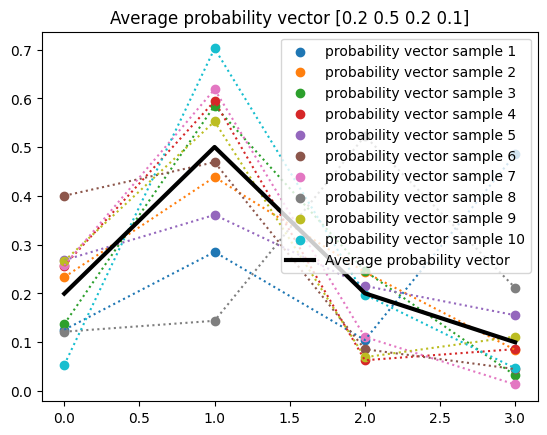

In [ ]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector");
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

In the context of the chips example, the sequence $\mathbf x^{(t)}$ represents the cumulative number of each brand of chips sold at a convenience store over time, starting from a specific point in time defined as $t=0$. This point could be the beginning of a day, a week, or any other relevant start time for counting chip purchases. As time progresses and customers purchase chips, the counts within the vector $\mathbf x^{(t)}$ increase according to the purchases made. For instance, if a customer buys two bags of Brand A chips and one bag of Brand B chips, the counts for those respective brands in the vector would increase accordingly. This sequence essentially tracks the popularity or sales performance of each chip brand over time, evolving as more data on customer purchases is collected. The behavior of $\mathbf x^{(t)}$ over time will depend on customer preferences, availability of the chips, and potentially external factors influencing buying decisions. It provides a snapshot at any given time $t$ of which chip brands are being purchased more frequently, thereby offering insight into customer preferences and sales trends for the convenience store's inventory of chip brands.



2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.




The distribution $p(\mathbf p | \mathbf x^{(t)})$ is a Dirichlet distribution, representing our updated belief about the "best chips" based on observed sales data $\mathbf x^{(t)}$. The parameter of this posterior Dirichlet distribution is $\boldsymbol\alpha + \mathbf x^{(t)}$, where $\boldsymbol\alpha$ is the vector of prior parameters and $\mathbf x^{(t)}$ is the vector of observed sales counts for each chip brand.

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$.

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each.

In [ ]:
from scipy.stats import dirichlet

# Given x^(t) = [2, 5, 2, 1] and alpha = [1, 1, 1, 1] for the prior
x_t = np.array([2, 5, 2, 1])
alpha = np.ones(len(x_t))

# Updated alpha for the posterior
alpha_posterior = alpha + x_t

# Sampling from the posterior Dirichlet distribution
samples = dirichlet.rvs(alpha_posterior, size=10000)

# Extracting samples for p_j (e.g., j=1 for the second chip brand)
j = 1
p_j_samples = samples[:, j-1]  # Adjusting j to Python's 0-indexing

# Display the first few samples for demonstration
p_j_samples[:10]


4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [ ]:
# Initialize parameters
x_t = np.array([2, 5, 2, 1])  # observed sales data
alpha = np.ones(len(x_t))  # prior
alpha_posterior = alpha + x_t  # updated alpha for the posterior
q = 0.25  # threshold value for comparison

# Sample from the posterior distribution
samples = dirichlet.rvs(alpha_posterior, size=100000)

# Extracting samples for p_j (e.g., j=1 for the second chip brand)
j = 1
p_j_samples = samples[:, j-1]  # Adjusting j to Python's 0-indexing

# Estimate the probability that p_j > q
probability_p_j_greater_q = np.mean(p_j_samples > q)

# Print the estimated probability
print("Estimated probability that p_j > q:", probability_p_j_greater_q)


Estimated probability that p_j > q: 0.33579


5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$.


In [ ]:
# Calculate the 95% credible interval for p_j
credible_interval_95 = np.percentile(p_j_samples, [2.5, 97.5])

# Print the 95% credible interval
print("95% credible interval for p_j:", credible_interval_95)


95% credible interval for p_j: [0.05007517 0.45482397]


6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [ ]:
# Define j and j' (e.g., comparing the first and second chip brands)
j = 1  # For the first chip brand
j_prime = 2  # For the second chip brand

# Calculate the probability that p_j > p_j'
probability_p_j_greater_p_j_prime = np.mean(samples[:, j-1] > samples[:, j_prime-1])

# Print the estimated probability
print(f"Estimated probability that p_{j} > p_{j_prime}:", probability_p_j_greater_p_j_prime)


Estimated probability that p_1 > p_2: 0.1441


7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [ ]:
# Compute the ratio of p_j to p_j'
ratio_p_j_p_j_prime = samples[:, j-1] / samples[:, j_prime-1]

# Calculate the 95% credible interval for the ratio
credible_interval_ratio_95 = np.percentile(ratio_p_j_p_j_prime, [2.5, 97.5])

# Print the 95% credible interval for the ratio
print("95% credible interval for the ratio p_j/p_j':", credible_interval_ratio_95)


95% credible interval for the ratio p_j/p_j': [0.0928583  1.86969425]


8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$.

In [ ]:
# Compute the difference between p_j and p_j'
difference_p_j_p_j_prime = samples[:, j-1] - samples[:, j_prime-1]

# Calculate the 95% credible interval for the difference
credible_interval_difference_95 = np.percentile(difference_p_j_p_j_prime, [2.5, 97.5])

# Print the 95% credible interval for the difference
print("95% credible interval for the difference p_j - p_j':", credible_interval_difference_95)


95% credible interval for the difference p_j - p_j': [-0.58564851  0.19444909]


9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


The distributions $p\left(\left.\frac{p_j}{p_{j^{\prime}}} \right\rvert\, \mathbf{x}^{(t)}\right)$ and $p\left(p_j-p_{j^{\prime}} \mid \mathbf{x}^{(t)}\right)$ capture different aspects of brand comparison:
- Ratio $\frac{p_j}{p_{j^{\prime}}}$ emphasizes relative popularity, indicating how many times more likely one brand is chosen over another. It's especially informative for comparing brands with smaller probabilities (e.g., $p_4$ vs. $p_5$ ), where both might have low sales, but one is relatively more preferred.
- Difference $p_j-p_{j^{\prime}}$ highlights the absolute difference in popularity, useful for understanding the direct advantage in choice probability. This measure is more impactful when comparing more popular brands (e.g., $p_2$ vs. $p_3$ ), showing a significant gap in their probabilities.

For $\left(j, j^{\prime}\right)=(2,3)$, both metrics are meaningful because the brands have moderate to high probabilities, indicating both relative and absolute differences in popularity. For $\left(j, j^{\prime}\right)=(4,5)$, despite the same ratio indicating relative preference, the actual difference in probabilities is minimal, emphasizing that both brands are similarly unpopular, though one is slightly more preferred than the other.

Thus, the choice between ratio and difference depends on the context of comparison: the ratio for understanding relative preference, especially among less popular choices, and the difference for quantifying the exact advantage in popularity among more common choices.

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


To meaningfully examine \(p\left(\frac{p_4}{p_{5}} | \mathbf{x}^{(t)}\right)\) or \(p\left(p_4 - p_{5} | \mathbf{x}^{(t)} \right)\) with the actual probabilities \(\mathbf{p} = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]\), \(t\) must be sufficiently large. This is because \(p_4\) and \(p_5\) are very small, and a large number of observations (\(t\)) are needed to accurately capture events of such low probability, ensuring that the estimates for the ratios and differences between these probabilities are reliable and representative of the true distribution.